## Renderer

In this tutorial, we will learn to use different modes of iGibson renderer, and the types of sensor simulation it can support.

## Overview
We developed our own MeshRenderer that supports customizable camera configuration and various image modalities, and renders at a lightening speed. Specifically, you can specify image width, height and vertical field of view in the constructor of `class MeshRenderer`. Then you can call `renderer.render(modes=('rgb', 'normal', 'seg', '3d', 'optical_flow', 'scene_flow'))` to retrieve the images. Currently we support six different image modalities: RGB, surface normal, segmentation, 3D point cloud (z-channel can be extracted as depth map), optical flow, and scene flow. We also support two types of LiDAR sensors: 1-beam and 16-beam (like Velodyne VLP-16). Most of the code can be found in [gibson2/render](https://github.com/StanfordVL/iGibson/tree/master/gibson2/render).


## Simple Example


In this example, we render an iGibson scene with a few lines of code. The code can be found in [gibson2/examples/demo/mesh_renderer_simple_example.py](https://github.com/StanfordVL/iGibson/blob/master/gibson2/examples/demo/mesh_renderer_simple_example.py).


INFO:root:Device 0 is available for rendering
INFO:root:Using device 0 for rendering
INFO:root:Loading /opt/igibson/gibson2/data/g_dataset/Rs/mesh_z_up.obj


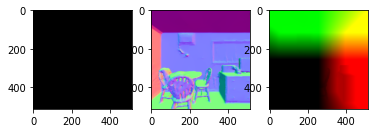

In [4]:
import cv2
import sys
import os
import numpy as np
from gibson2.render.mesh_renderer.mesh_renderer_cpu import MeshRenderer
from gibson2.utils.assets_utils import get_scene_path
import matplotlib.pyplot as plt

model_path = os.path.join(get_scene_path('Rs'), 'mesh_z_up.obj')
renderer = MeshRenderer(width=512, height=512)
renderer.load_object(model_path)
renderer.add_instance(0)
camera_pose = np.array([0, 0, 1.2])
view_direction = np.array([1, 0, 0])
renderer.set_camera(camera_pose, camera_pose + view_direction, [0, 0, 1])
renderer.set_fov(90)
frames = renderer.render(modes=('rgb', 'normal', '3d'))

plt.figure()
plt.subplot(1,3,1)
plt.imshow((frames[0] * 255).astype(np.uint8))
plt.subplot(1,3,2)
plt.imshow(frames[1])
plt.subplot(1,3,3)
plt.imshow(frames[2])

